In [ ]:
#Importer les bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#charger  dataset
Cancer_data=pd.read_csv('/content/drive/MyDrive/ProjectMachineLearning/BreastCancerData.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Afficher les 5 premiers colonnes du dataset
Cancer_data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
#afficher les 5 derniers colonnes du dataset
Cancer_data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [ ]:
#vériier s'il y a des valeurs nulls
Cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Supprimer la dernière colonne contenant des valeurs NaN
Cancer_data.dropna(axis=1, inplace=True)

In [ ]:
# Supprimer la colonne 'id'
Cancer_data.drop(columns=['id'], inplace=True)

In [ ]:
# Convertir la colonne "diagnosis" en valeurs numériques
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Cancer_data["diagnosis"] = label_encoder.fit_transform(Cancer_data["diagnosis"])
Cancer_data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
# Visualisation des relations
# Par exemple, visualisation de la distribution des caractéristiques selon les classes de tumeurs
sns.pairplot(Cancer_data, hue='diagnosis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

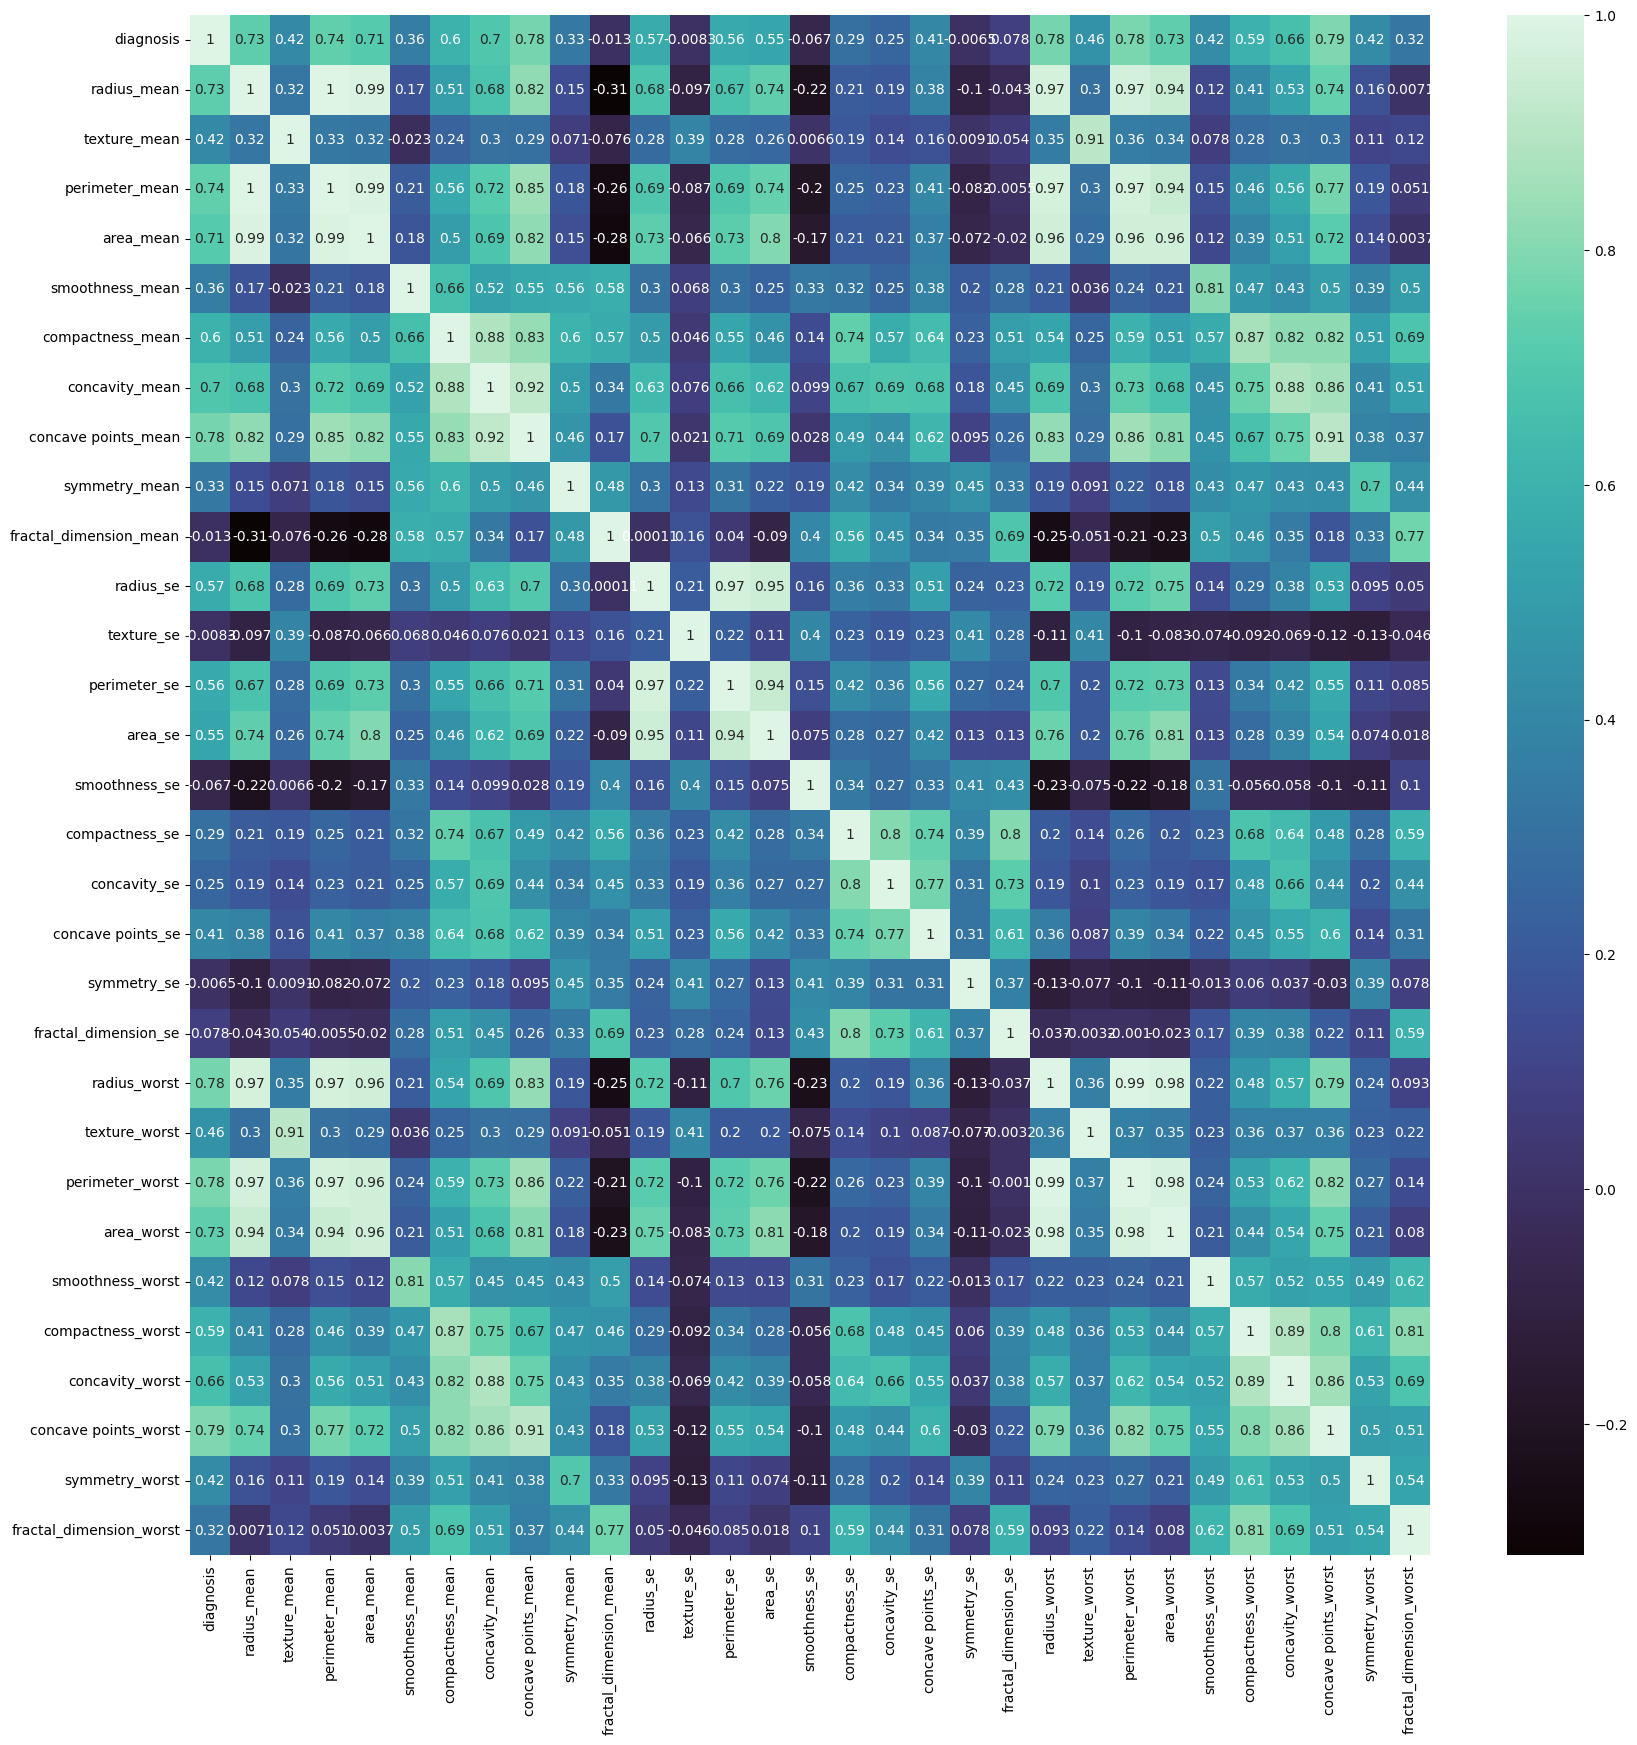

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Cancer_data.corr(),annot=True,cmap="mako")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Sélection des caractéristiques à normaliser (toutes les colonnes sauf 'id' et 'diagnosis')
features_to_normalize = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
# Initialisation du MinMaxScaler
scaler = MinMaxScaler()
# Normalisation des données
Cancer_data[features_to_normalize] = scaler.fit_transform(Cancer_data[features_to_normalize])
Cancer_data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     0.521037      0.022658        0.545989   0.363733   
1          1     0.643144      0.272574        0.615783   0.501591   
2          1     0.601496      0.390260        0.595743   0.449417   
3          1     0.210090      0.360839        0.233501   0.102906   
4          1     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       0.686364  ...      0.620776       0.141525         0.668310   
1       0.379798  ...      0.606901       0.303571         0.539818   
2       0.509596  ...      0.556386       0.360075         0.508442   
3       0.776263  ...      0.248310       0.385928         0.241347   
4       0.378283  ...      0.519744       0.123934         0.506948   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 31 columns]

In [ ]:
# Séparer les caractéristiques et la cible
X = Cancer_data.drop(columns=["diagnosis"])
y = Cancer_data["diagnosis"]

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score



In [ ]:
# Initialiser les modèles
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

In [ ]:
# Entraîner les modèles
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher pour chaque modèle
log_reg_params = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
decision_tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


In [ ]:

# Initialiser les GridSearchCV pour chaque modèle avec sa grille d'hyperparamètres
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5)
svm_grid = GridSearchCV(SVC(), svm_params, cv=5)

In [ ]:
# Effectuer la recherche par grille pour chaque modèle
log_reg_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
decision_tree_grid.fit(X_train, y_train)
svm_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Obtenir les meilleurs hyperparamètres et le meilleur score de chaque modèle
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_)
print("Best parameters for KNN:", knn_grid.best_params_)
print("Best parameters for Decision Tree:", decision_tree_grid.best_params_)
print("Best parameters for SVM:", svm_grid.best_params_)

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best parameters for KNN: {'n_neighbors': 3}
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [ ]:
# Evaluer les modèles avec les meilleurs hyperparamètres
log_reg_best = log_reg_grid.best_estimator_
knn_best = knn_grid.best_estimator_
decision_tree_best = decision_tree_grid.best_estimator_
svm_best = svm_grid.best_estimator_


In [ ]:
#Calcul accuracy
log_reg_accuracy = log_reg_best.score(X_test, y_test)
knn_accuracy = knn_best.score(X_test, y_test)
decision_tree_accuracy = decision_tree_best.score(X_test, y_test)
svm_accuracy = svm_best.score(X_test, y_test)

In [ ]:
print("Accuracy Logistic Regression:", log_reg_accuracy)
print("Accuracy KNN:", knn_accuracy)
print("Accuracy Decision Tree:", decision_tree_accuracy)
print("Accuracy SVM:", svm_accuracy)

Accuracy Logistic Regression: 0.9736842105263158
Accuracy KNN: 0.9649122807017544
Accuracy Decision Tree: 0.9298245614035088
Accuracy SVM: 0.9736842105263158


In [ ]:
# Prédiction
ypredLog_reg = log_reg.predict(X_test)
ypredKnn = knn.predict(X_test)
ypreDecision_arbre = decision_tree.predict(X_test)
ypredSvm = svm.predict(X_test)

In [ ]:
report_logreg = classification_report(y_test, ypredLog_reg)
print("report régression logistique:", report_logreg)
report_knn = classification_report(y_test, ypredKnn)
print("report KNN:", report_knn)
report_arbreDecision = classification_report(y_test, ypreDecision_arbre)
print("report arbre Decision:", report_arbreDecision)
report_SVM = classification_report(y_test, ypredSvm)
print("report SVM:",report_SVM)

report régression logistique:               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

report KNN:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

report arbre Decision:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted 

In [ ]:
# Comparaison des performances des différents modèles
print("\nComparaison des performances des différents modèles :")
print("Régression logistique:report",report_logreg)
print("KNN:report=",report_knn)
print("Arbre de décision:report=",report_arbreDecision)
print("SVM:report=",report_SVM)



Comparaison des performances des différents modèles :
Régression logistique:report               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

KNN:report=               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Arbre de décision:report=               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   mac

In [ ]:
# Accéder aux coefficients de la régression logistique
coefficients = log_reg.coef_[0]

# Associer les coefficients aux noms des caractéristiques
feature_importance = pd.DataFrame({'Caractéristique': X.columns, 'Coefficient': coefficients})

# Trier les caractéristiques par coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Afficher les caractéristiques par ordre d'importance
print(feature_importance)


            Caractéristique  Coefficient
27     concave points_worst     2.488413
21            texture_worst     2.289396
20             radius_worst     2.190417
7       concave points_mean     2.048620
22          perimeter_worst     1.980092
0               radius_mean     1.750857
2            perimeter_mean     1.715912
1              texture_mean     1.683463
23               area_worst     1.572854
3                 area_mean     1.480312
24         smoothness_worst     1.423265
28           symmetry_worst     1.387246
26          concavity_worst     1.331684
6            concavity_mean     1.322300
10                radius_se     1.134152
12             perimeter_se     0.858349
9    fractal_dimension_mean    -0.804753
25        compactness_worst     0.795136
13                  area_se     0.751359
15           compactness_se    -0.659133
19     fractal_dimension_se    -0.652765
4           smoothness_mean     0.629366
8             symmetry_mean     0.464984
5          compa

In [ ]:
# Accéder aux indices des vecteurs de support
support_indices = svm.support_

# Accéder aux caractéristiques associées aux vecteurs de support
support_features = X.iloc[support_indices]

# Afficher les caractéristiques associées aux vecteurs de support
print(support_features)


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
6       0.533343      0.347311        0.523875   0.380276         0.379164   
22      0.395617      0.153872        0.405708   0.237922         0.493545   
24      0.457617      0.394657        0.457536   0.322842         0.536878   
46      0.057504      0.241123        0.054730   0.024772         0.301255   
..           ...           ...             ...        ...              ...   
409     0.250319      0.277646        0.239237   0.136840         0.308928   
413     0.379052      0.419344        0.371363   0.233383         0.293581   
435     0.331251      0.335137        0.327068   0.193425         0.481809   
441     0.486961      0.531282        0.474121   0.333107         0.276970   
445     0.237068      0.513358        0.233709   0.126320         0.454726   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
#Identification des caractéristiques les plus importantes pour la classification des tumeurs
#Pour la régression logistique :
1-concave points_worst
2-texture_worst
3-radius_worst
4-concave points_mean
5-perimeter_worst

In [ ]:
import joblib

# Suppose log_reg est notre modèle de régression logistique entraîné
joblib.dump(log_reg, 'log_reg.pkl')


['log_reg.pkl']

In [ ]:
pip install flask

In [ ]:
from flask import Flask, request, render_template
import numpy as np
import joblib

# Charger le modèle de régression logistique
model = joblib.load("log_reg.pkl")

# Initialiser Flask
app = Flask(__name__)

# Définir la route de l'interface utilisateur
@app.route("/", methods=["GET", "POST"])
def predict_diagnosis():
    if request.method == "GET":
        return render_template("index.html")
    elif request.method == "POST":
        # Obtenir les mesures cliniques saisies par l'utilisateur
        features = []
        for key in request.form:
            features.append(float(request.form[key]))

        # Faire la prédiction
        prediction = model.predict([features])

        # Renvoyer le résultat de la prédiction à l'interface utilisateur
        return render_template("result.html", diagnosis=prediction[0])

# Lancer l'application Flask
if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
